# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device using: {device}")

Device using: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [4]:
# Create the data parameters
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01
# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [5]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [6]:
# Plot the training and testing data
# building a func to visualize
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  # plotting training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # plotting testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # plot predictions if exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})



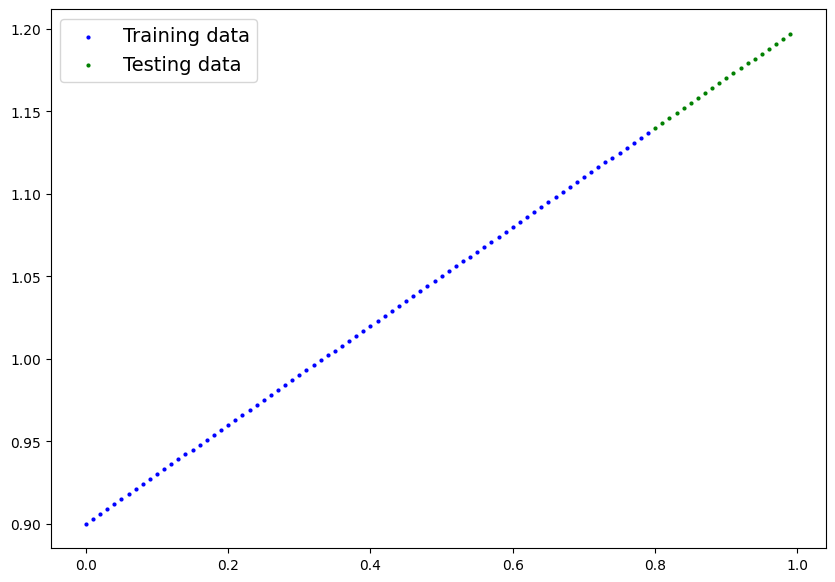

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [8]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
# <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)) #these are default
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #track gradients
                                            dtype=torch.float))

  # forward method -> check torch.nn.module
  # defines computations performed
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [9]:
# Instantiate the model and put it to the target device

# create random seed
torch.manual_seed(42)

# create instance(subclass of nn.module)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
with torch.inference_mode():
  y_preds = model_0(X_test)

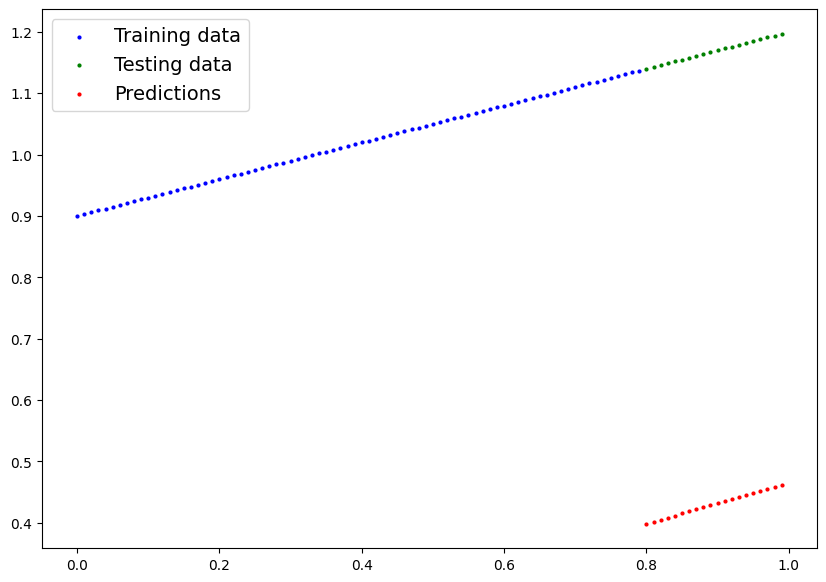

In [13]:
plot_predictions(predictions=y_preds)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [14]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [15]:
# Training loop
epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

# Train model for 300 epochs


# Send data to target device


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)


  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:


    # Put model in evaluation mode and setup inference context

      # 1. Forward pass
      test_pred = model_0(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)
      # Print out what's happening
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Loss: 0.7566978335380554
Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Loss: 0.745137631893158
Loss: 0.7335773706436157
Loss: 0.7220171093940735
Loss: 0.7104568481445312
Loss: 0.698896586894989
Loss: 0.6873363256454468
Loss: 0.6757761240005493
Loss: 0.6642158627510071
Loss: 0.6526556015014648
Loss: 0.6410952806472778
Loss: 0.6295350790023804
Loss: 0.6179748773574829
Loss: 0.6064146161079407
Loss: 0.5948542952537537
Loss: 0.5832940936088562
Loss: 0.571733832359314
Loss: 0.5601736307144165
Loss: 0.5486133694648743
Loss: 0.537053108215332
Loss: 0.5254928469657898
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Loss: 0.5139325857162476
Loss: 0.5023724436759949
Loss: 0.49081215262413025
Loss: 0.4792519211769104
Loss: 0.46769165992736816
Loss: 0.4561313986778259
Loss: 0.44457119703292847
Loss: 0.4330109655857086
Loss: 0.4214507043361664
Loss: 0.40989047288894653
Loss: 0.3983302414417267
Loss: 0.38676998019218445
Loss: 0.3752097487449646
Loss: 0.36364954710006714
Loss: 0.3520892858505249
L

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [16]:
# Make predictions with the model
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

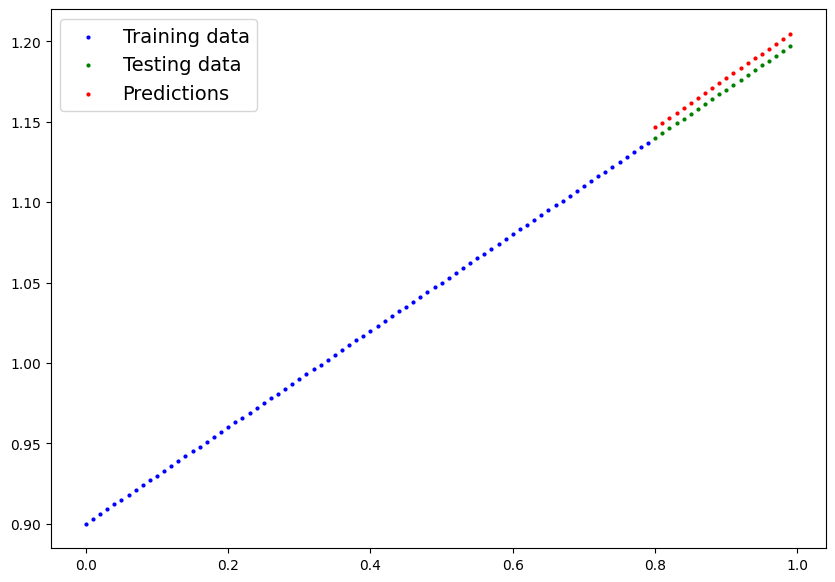

In [19]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds_new)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [20]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [27]:
# Make predictions with loaded model and compare them to the previous
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds[:5]


tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587]])

In [28]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds[:5]

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587]])

In [29]:
# Compare loaded model preds with orginal
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])